In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
data=pd.read_csv("test.csv")
data1=pd.read_csv("train.csv")
merged_df = pd.merge(data,data1, on='PassengerId', how='inner')
data.head()


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [42]:
data.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [43]:
data.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [45]:
data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [46]:
data.dropna(subset=["Fare"],inplace=True)
data["Cabin"] = data["Cabin"].fillna("unknown")
data["Age"] = data["Age"].fillna(data["Age"].mean())

In [47]:
data.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [48]:
data.duplicated().sum()

0

In [49]:
print(merged_df.columns)

Index(['PassengerId', 'Pclass_x', 'Name_x', 'Sex_x', 'Age_x', 'SibSp_x',
       'Parch_x', 'Ticket_x', 'Fare_x', 'Cabin_x', 'Embarked_x', 'Survived',
       'Pclass_y', 'Name_y', 'Sex_y', 'Age_y', 'SibSp_y', 'Parch_y',
       'Ticket_y', 'Fare_y', 'Cabin_y', 'Embarked_y'],
      dtype='object')


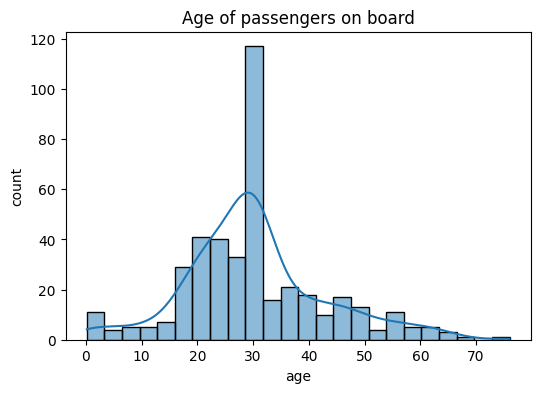

In [50]:
plt.figure(figsize=(6,4))
sns.histplot(data["Age"],kde=True)
plt.title("Age of passengers on board")
plt.xlabel("age")
plt.ylabel("count")
plt.show()

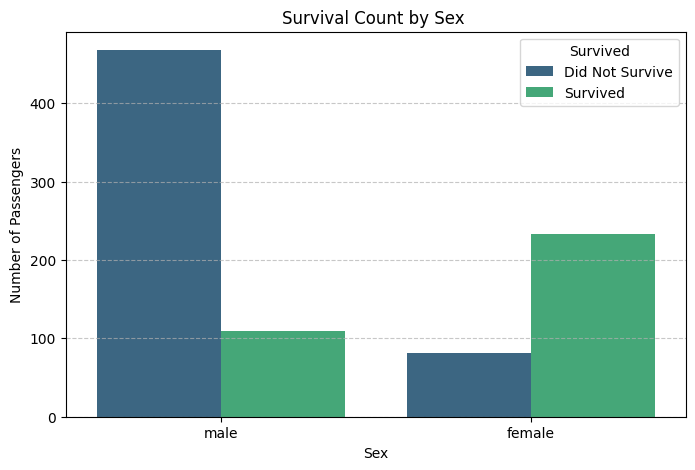

In [51]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Sex', hue='Survived', data=data1, palette='viridis')
plt.title('Survival Count by Sex ')
plt.xlabel('Sex')
plt.ylabel('Number of Passengers')
plt.legend(title='Survived', labels=['Did Not Survive', 'Survived'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


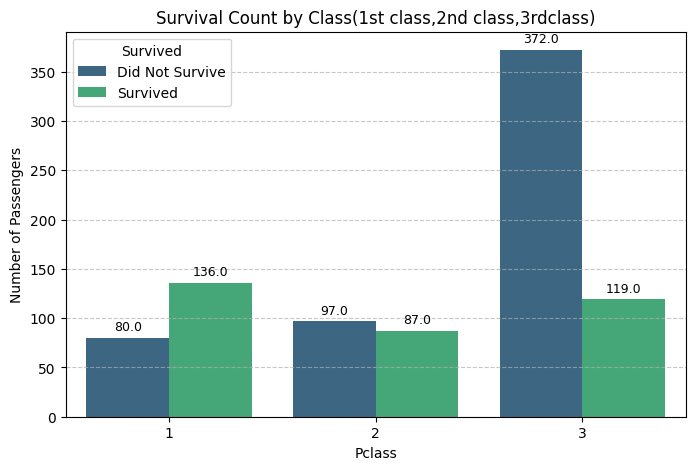

In [39]:
plt.figure(figsize=(8, 5))
ax = sns.countplot(x='Pclass', hue='Survived', data=data1, palette='viridis')
plt.title('Survival Count by Class(1st class,2nd class,3rdclass)')
plt.xlabel('Pclass')
plt.ylabel('Number of Passengers')
plt.legend(title='Survived', labels=['Did Not Survive', 'Survived'])
plt.grid(axis='y', linestyle='--', alpha=0.7)

for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        if height > 0:
            ax.annotate(f'{height}', 
                        xy=(bar.get_x() + bar.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords='offset points',
                        ha='center', va='bottom', fontsize=9, color='black')

plt.show()